<a href="https://colab.research.google.com/github/SUDEEPPATNAYAK/BIG-DATA-ANALYTICS/blob/main/DESCRIPTIVE_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("large_sales_data (1).csv")
df.head()

,OrderID,Date,Region,Category,SubCategory,Sales,Profit,Quantity,CustomerType,PaymentMode
0,1,2024-01-01 00:00:00,West,Clothing,Mobile,5227,2636,33,Returning,Credit Card
1,2,2024-01-01 01:00:00,Central,Books,Table,9098,2948,23,New,Wallet
2,3,2024-01-01 02:00:00,East,Electronics,Laptop,2822,-460,13,New,Cash
3,4,2024-01-01 03:00:00,Central,Books,Chair,4756,42,49,VIP,UPI
4,5,2024-01-01 04:00:00,Central,Furniture,Laptop,1425,-186,14,VIP,Cash


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       3000 non-null   int64 
 1   Date          3000 non-null   object
 2   Region        3000 non-null   object
 3   Category      3000 non-null   object
 4   SubCategory   3000 non-null   object
 5   Sales         3000 non-null   int64 
 6   Profit        3000 non-null   int64 
 7   Quantity      3000 non-null   int64 
 8   CustomerType  3000 non-null   object
 9   PaymentMode   3000 non-null   object
dtypes: int64(4), object(6)
memory usage: 234.5+ KB


In [ ]:
df.shape

(3000, 10)

In [ ]:
df.isnull().sum()

,0
OrderID,0
Date,0
Region,0
Category,0
SubCategory,0
Sales,0
Profit,0
Quantity,0
CustomerType,0
PaymentMode,0


In [ ]:
df.duplicated()
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

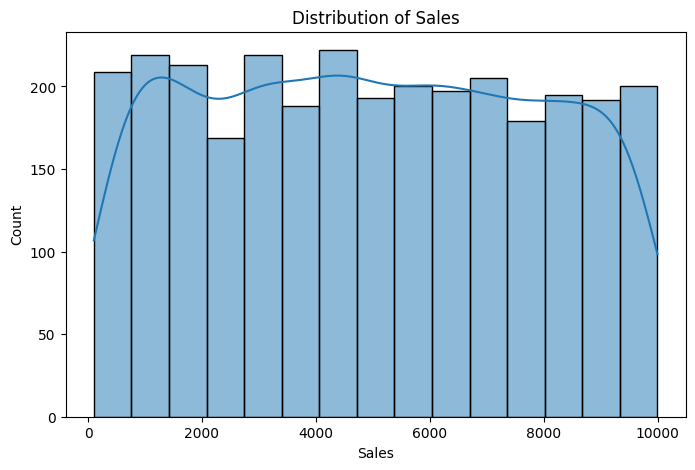

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.show()

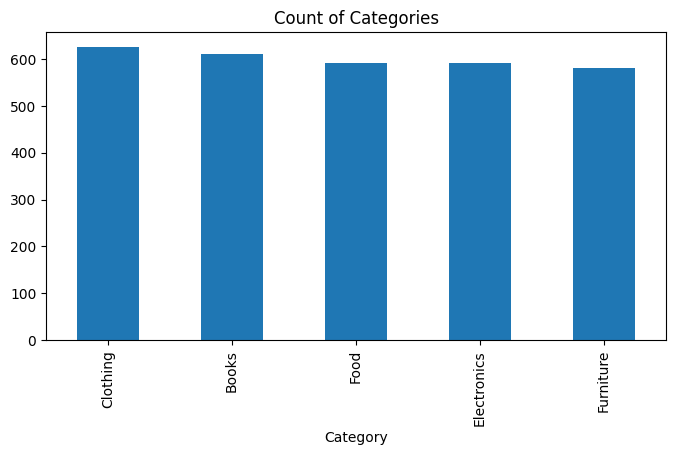

In [ ]:
plt.figure(figsize=(8,4))
df['Category'].value_counts().plot(kind='bar')
plt.title("Count of Categories")
plt.show()


In [ ]:
df.groupby('Category')['Sales'].sum()


,Sales
Category,
Books,2977763
Clothing,3046215
Electronics,2986479
Food,2962574
Furniture,2957051


In [ ]:
df.groupby('Region')['Profit'].mean()



,Profit
Region,
Central,981.861338
East,1063.224779
North,986.237864
South,996.948630
West,956.208065


In [ ]:


df.groupby('Category').agg({
    'Sales': ['sum', 'mean', 'max'],
    'Profit': ['mean', 'min']
})

Sales                          Profit      
                 sum         mean   max         mean   min
Category                                                  
Books        2977763  4881.578689  9994   963.114754  -994
Clothing     3046215  4866.158147  9991  1017.915335 -1000
Electronics  2986479  5053.263959  9962   993.494078  -998
Food         2962574  5004.347973  9994  1037.059122  -985
Furniture    2957051  5089.588640  9995   966.189329  -998

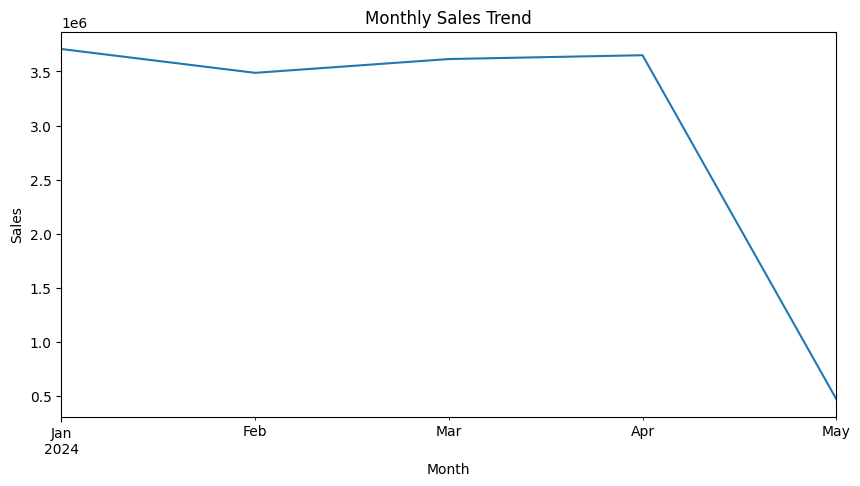

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.show()


This program performs exploratory data analysis on a sales dataset. Here's a breakdown of each step:

### **1. Import Libraries**

The first cell imports necessary libraries: `pandas` for data manipulation, `numpy` for numerical operations, `matplotlib.pyplot` for plotting, and `seaborn` for enhanced visualizations.

### **2. Load and Inspect Data**

**`df = pd.read_csv("large_sales_data (1).csv")`**
- Reads the CSV file named `large_sales_data (1).csv` into a pandas DataFrame called `df`.

**`df.head()`**
- Displays the first 5 rows of the DataFrame, giving a quick overview of the data structure and content.

**`df.info()`**
- Prints a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage. This helps in understanding the data quality and types.

**`df.shape`**
- Returns a tuple representing the dimensions of the DataFrame (number of rows, number of columns).

**`df.isnull().sum()`**
- Calculates the number of missing (null) values in each column. This is crucial for identifying columns that might require missing value imputation or handling.

**`df.duplicated()`**
- Returns a boolean Series indicating whether each row is a duplicate of a previous row.

**`df.drop_duplicates(inplace=True)`**
- Removes duplicate rows from the DataFrame. `inplace=True` modifies the DataFrame directly.

**`df.duplicated().sum()`**
- After dropping duplicates, this re-checks and confirms if any duplicate rows still exist (the output `np.int64(0)` indicates no duplicates remaining).

### **3. Data Visualization**

**`plt.figure(figsize=(8,5))`**
- Creates a new figure for plotting with a specified size (8 inches wide, 5 inches tall).

**`sns.histplot(df['Sales'], kde=True)`**
- Generates a histogram of the 'Sales' column. The `kde=True` argument adds a Kernel Density Estimate (KDE) line, which smooths the distribution to show the probability density.

**`plt.title("Distribution of Sales")`**
- Sets the title of the plot.

**`plt.show()`**
- Displays the generated plot.

**`plt.figure(figsize=(8,4))`**
- Creates another plot figure with a size of 8x4 inches.

**`df['Category'].value_counts().plot(kind='bar')`**
- Calculates the frequency of each unique value in the 'Category' column using `value_counts()` and then plots these counts as a bar chart.

**`plt.title("Count of Categories")`**
- Sets the title of the bar chart.

**`plt.show()`**
- Displays the bar chart.

### **4. Data Aggregation and Analysis**

**`df.groupby('Category')['Sales'].sum()`**
- Groups the DataFrame by the 'Category' column and then calculates the sum of 'Sales' for each category. This shows total sales per product category.

**`df.groupby('Region')['Profit'].mean()`**
- Groups the DataFrame by the 'Region' column and computes the average 'Profit' for each region. This helps in understanding profitability across different geographical areas.

**`df.groupby('Category').agg(...)`**
- Groups the DataFrame by 'Category' and applies multiple aggregation functions:
    - For 'Sales': calculates the sum, mean, and maximum sales.
    - For 'Profit': calculates the mean and minimum profit.
- This provides a comprehensive statistical summary for sales and profit within each category.

**`df['Date'] = pd.to_datetime(df['Date'])`**
- Converts the 'Date' column to datetime objects. This is essential for time-series analysis.

**`df['Month'] = df['Date'].dt.to_period('M')`**
- Extracts the month from the 'Date' column and stores it as a `Period` object (e.g., 'YYYY-MM') in a new 'Month' column.

**`monthly_sales = df.groupby('Month')['Sales'].sum()`**
- Groups the DataFrame by the newly created 'Month' column and calculates the total 'Sales' for each month.

**`monthly_sales.plot(figsize=(10,5))`**
- Plots the `monthly_sales` Series as a line graph, displaying the trend of sales over time.

**`plt.title("Monthly Sales Trend")`**
- Sets the title of the plot.

**`plt.ylabel("Sales")`**
- Sets the y-axis label.

**`plt.show()`**
- Displays the monthly sales trend plot.